In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [109]:

df = pd.read_csv(r'./data/Advertising.csv', sep=',')
house = pd.read_csv(r'./data/house_sales.csv', sep='\t')

In [13]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


Estos datos de muestra muestran las ventas (en miles) de un producto en particular en función de los presupuestos publicitarios (en miles) para televisión, radio y periódicos.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.shape

(200, 4)

## Polynomial Regression

La fórmula para la regresión polinomial con una variable x<sub>1</sub> puede expresarse 
$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

La fórmula para la regresión polinomial con 2 variables  x<sub>1</sub> y  x<sub>2</sub> con grado dos puede expresarse

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x^2_1 + \beta_4x_1x_2 +  \beta_5x^2_2 + \epsilon$$


Donde:

Y es la variable dependiente que estamos tratando de predecir.</br></br>
&beta;<sub>0</sub>,&beta;<sub>1</sub>,&beta;<sub>2</sub>...&beta;<sub>5</sub>  son los coeficientes que el modelo de regresión polinomial ajustará para minimizar el error cuadrático.</br>


x<sub>1</sub> y  x<sub>2</sub> son las variables independientes originales.</br>

x<sup>2</sup> y  x<sup>2</sup> representan las características polinomiales de grado 2.



x<sub>1</sub>  x<sub>2</sub> es el término de interacción entre las variables x<sub>1</sub> y  x<sub>2</sub>.</br>

ε es el término de error que representa la diferencia entre la predicción realizada por el modelo y el valor real observado en los datos.</br>



La regresión polinomial ofrece una ventaja significativa al modelar relaciones no lineales entre variables independientes y la variable dependiente.A diferencia de la regresión lineal simple  y multiple, la regresión polinomial permite capturar patrones más complejos al considerar combinaciones de las variables independientes hasta un grado específico.

In [16]:
X = df.drop('sales',axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
# Importación de módulos y clases necesarios:
from sklearn.preprocessing import PolynomialFeatures

# Creación de una instancia
# Se especifica que se generarán características polinomiales de hasta segundo grado (degree=2). 
# El parámetro include_bias=False se establece para evitar agregar un término de sesgo a las características polinomiales.
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

#fit_transform() con esto la instancia aprende de los datos y luego transforma las características originales en características polinomiales.
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(200, 9)

In [20]:
type(poly_features)

numpy.ndarray

In [19]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [22]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [24]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

Las interacciones $$x_1  \cdot x_2 \text{  |  } x_1  \cdot x_3 \text{  |  }   x_2  \cdot x_3 $$

In [25]:
230.1*37.8

8697.779999999999

In [26]:
230.1*69.2

15922.92

In [27]:
37.8*69.2

2615.7599999999998

In [30]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)


model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


In [33]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)


print('MAE :',round(MAE, 5))
print('MSE :',round(MSE, 5))
print('RMSE',round(RMSE, 5))

MAE : 0.48968
MSE : 0.44175
RMSE 0.66464


## Regresión Lineal Multiple


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

modelo = LinearRegression()

modelo.fit(X_train,y_train)
test_predictions = modelo.predict(X_test)

In [35]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)


print('MAE :',round(MAE, 5))
print('MSE :',round(MSE, 5))
print('RMSE :',round(RMSE, 5))

MAE : 1.21375
MSE : 2.29872
RMSE : 1.51615


##  Comparación entre Regresión Polinomial y Regresión Lineal Multiple

**Resultados del conjunto de prueba (Nota: ¡use la misma división aleatoria para realizar una comparación justa!)**

* Linear Regression:
    * MAE:  1.21375
    * RMSE: 1.51615

* Polynomial 2-degree:
    * MAE:  0.48968
    * RMSE: 0.66464

El modelo final sería la Regresión Polinomial faltaría determinar con un bucle cual sería el mejor grado para el polinomio ya que se probó para el grado 2

In [51]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## Splines

In [110]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

In [111]:
#se utiliza un spline cúbico para modelar la relación entre "SqFtTotLiving" y "AdjSalePrice", con 6 grados de libertad y grado polinomial 3. 
#También se incluyen otras variables predictoras como "SqFtLot", "Bathrooms", "Bedrooms" y "BldgGrade".
#Con esta formula se controlará las predicciones del modelo cuando SqFtTotLiving varía, mientras mantenemos las otras variables constantes.


formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()

In [112]:
#  El gráfico resultante nos permite entender mejor la influencia individual de cada característica en las predicciones del modelo.

def partialResidualPlot(model, df, outcome, feature, ax):
    
    # Se utiliza el modelo de regresión especificado para predecir los valores de las variables dependientes
    # utilizando el DataFrame proporcionado (df).
    y_pred = model.predict(df)
    
    # Se crea una copia del DataFrame original para su manipulación.
    copy_df = df.copy()
    
    #se utiliza el sgte bucle para crear un nuevo DataFrame donde solo la variable feature conserva sus valores originales, 
    # y todas las demás variables se establecen en 0. 
    for c in copy_df.columns:
        #Si una columna es igual a la característica de interés (feature), se pasa a la siguiente iteración del bucle.
        
        if c == feature:
            continue
        
        #Se establecen todas las demás columnas en 0.
        copy_df[c] = 0.0
        
    
    #Se utilizan las predicciones del modelo para predecir los valores de la característica de interés utilizando el DataFrame modificado.
    feature_prediction = model.predict(copy_df)
    
    # DataFrame results que contiene la característica de interés, los residuos y las predicciones parciales.
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    
    
    #Se ordenan los resultados según los valores de la característica de interés.
    results = results.sort_values(by=['feature'])
    
    #Se aplica un suavizado no paramétrico a las predicciones parciales utilizando la función lowess de statsmodels.
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10592\598841115.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ypartial': feature_prediction - model.params[0],


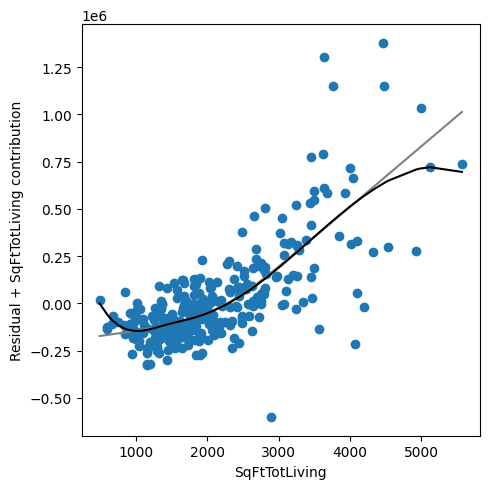

In [113]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()